In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft
from scipy.interpolate import interp1d
import numpy as npy
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [45]:
file_path = "2025-08-16_15_12_26_Muse_Recording.csv"
#change to your file path
df = pd.read_csv(file_path)
df.head()

for col_name in df.columns:
    print(col_name)

print(df.shape)

#Setting font size to 25 for all graphs
plt.rcParams.update({'font.size': 25})

PACKET_TYPE
PACKET_TIMESTAMP
CLOCK_TIME
ms_ELAPSED
TP9_CONNECTION_STRENGTH(HSI)
TP9_ARTIFACT_FREE(IS_GOOD)
AF7_CONNECTION_STRENGTH(HSI)
AF7_ARTIFACT_FREE(IS_GOOD)
AF8_CONNECTION_STRENGTH(HSI)
AF8_ARTIFACT_FREE(IS_GOOD)
TP10_CONNECTION_STRENGTH(HSI)
TP10_ARTIFACT_FREE(IS_GOOD)
TP9_RAW
AF7_RAW
AF8_RAW
TP10_RAW
TP9_DELTA_RELATIVE
AF7_DELTA_RELATIVE
AF8_DELTA_RELATIVE
TP10_DELTA_RELATIVE
TP9_THETA_RELATIVE
AF7_THETA_RELATIVE
AF8_THETA_RELATIVE
TP10_THETA_RELATIVE
TP9_ALPHA_RELATIVE
AF7_ALPHA_RELATIVE
AF8_ALPHA_RELATIVE
TP10_ALPHA_RELATIVE
TP9_BETA_RELATIVE
AF7_BETA_RELATIVE
AF8_BETA_RELATIVE
TP10_BETA_RELATIVE
TP9_GAMMA_RELATIVE
AF7_GAMMA_RELATIVE
AF8_GAMMA_RELATIVE
TP10_GAMMA_RELATIVE
730nm_LEFT_OUTER
730nm_RIGHT_OUTER
850nm_LEFT_OUTER
850nm_RIGHT_OUTER
730nm_LEFT_INNER
730nm_RIGHT_INNER
850nm_LEFT_INNER
850nm_RIGHT_INNER
RED_LEFT_OUTER
RED_RIGHT_OUTER
AMBIENT_LEFT_OUTER
AMBIENT_RIGHT_OUTER
RED_LEFT_INNER
RED_RIGHT_INNER
AMBIENT_LEFT_INNER
AMBIENT_RIGHT_INNER
BATTERY_PERCENT
(12767, 53)


/tmp/ipykernel_7828/3951728004.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


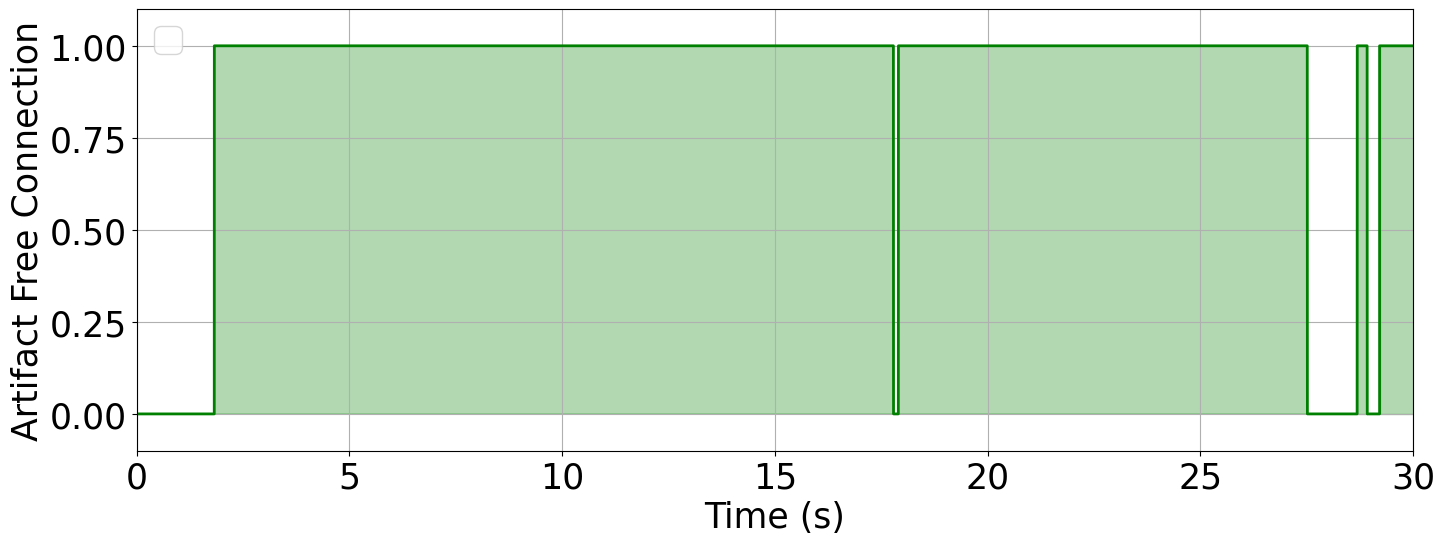

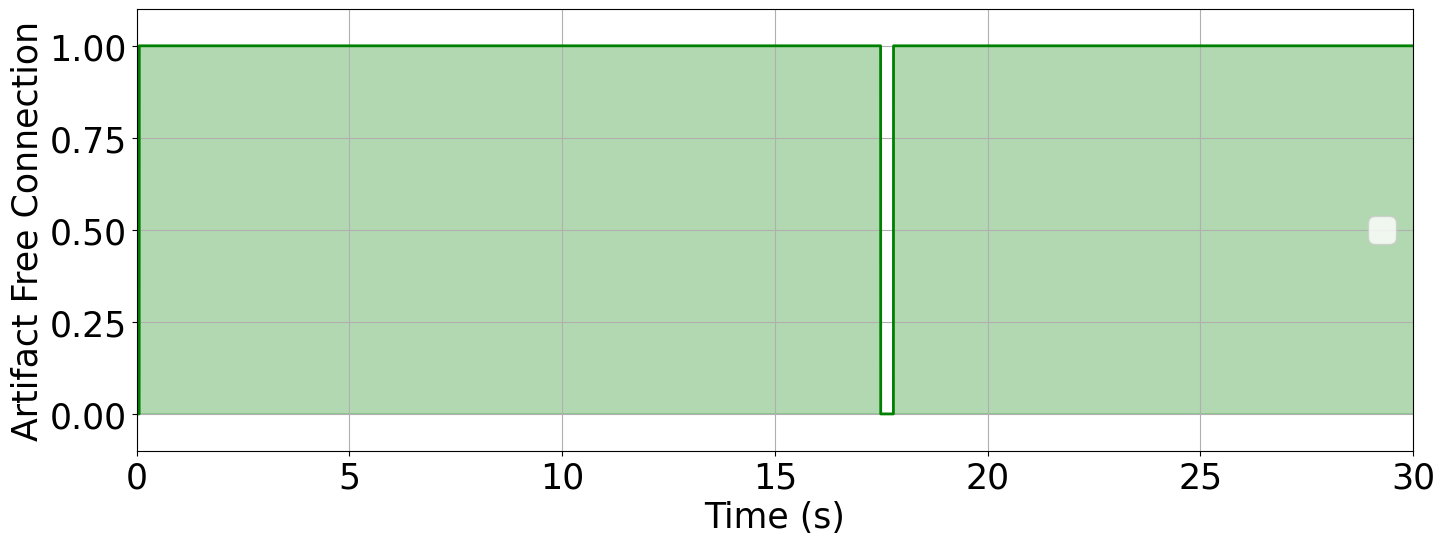

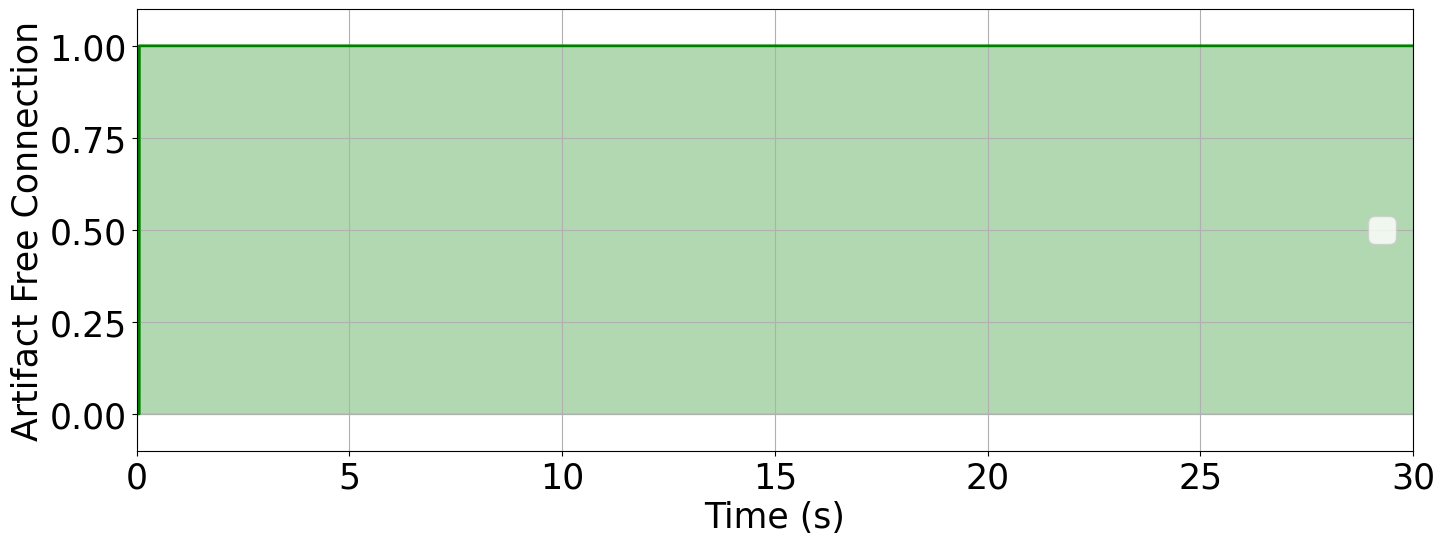

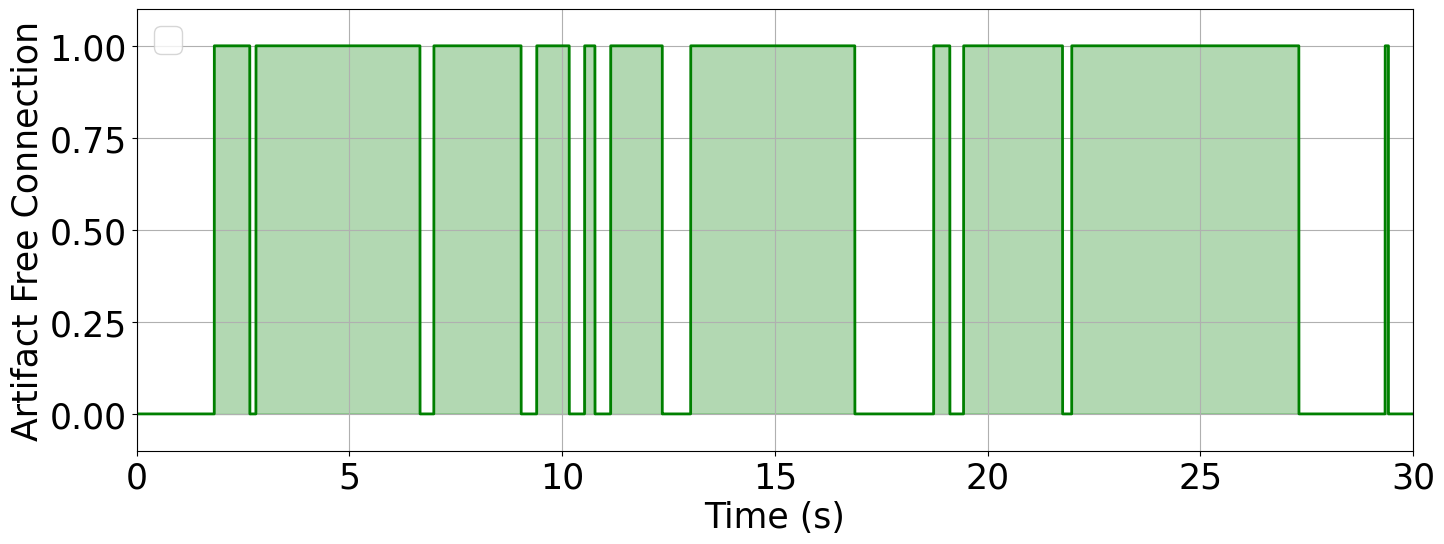

In [46]:
#Artifact Detection Code

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]

for ch in channels:
    artifact_col = ch + "_ARTIFACT_FREE(IS_GOOD)"

    plt.figure(figsize=(15, 6))

    plt.plot(time_sec, df[artifact_col], linewidth=2, color='green')
    plt.fill_between(time_sec, 0, df[artifact_col], where=(df[artifact_col] >0), color='green', alpha=0.3)

    plt.xlabel("Time (s)")
    plt.ylabel("Artifact Free Connection")
    #plt.title(f"Artifact Status for Channel {ch}")

    plt.grid(True)
    plt.legend()
    plt.ylim(-0.1, 1.1)
    plt.xlim(0,30)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_7828/1267927110.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


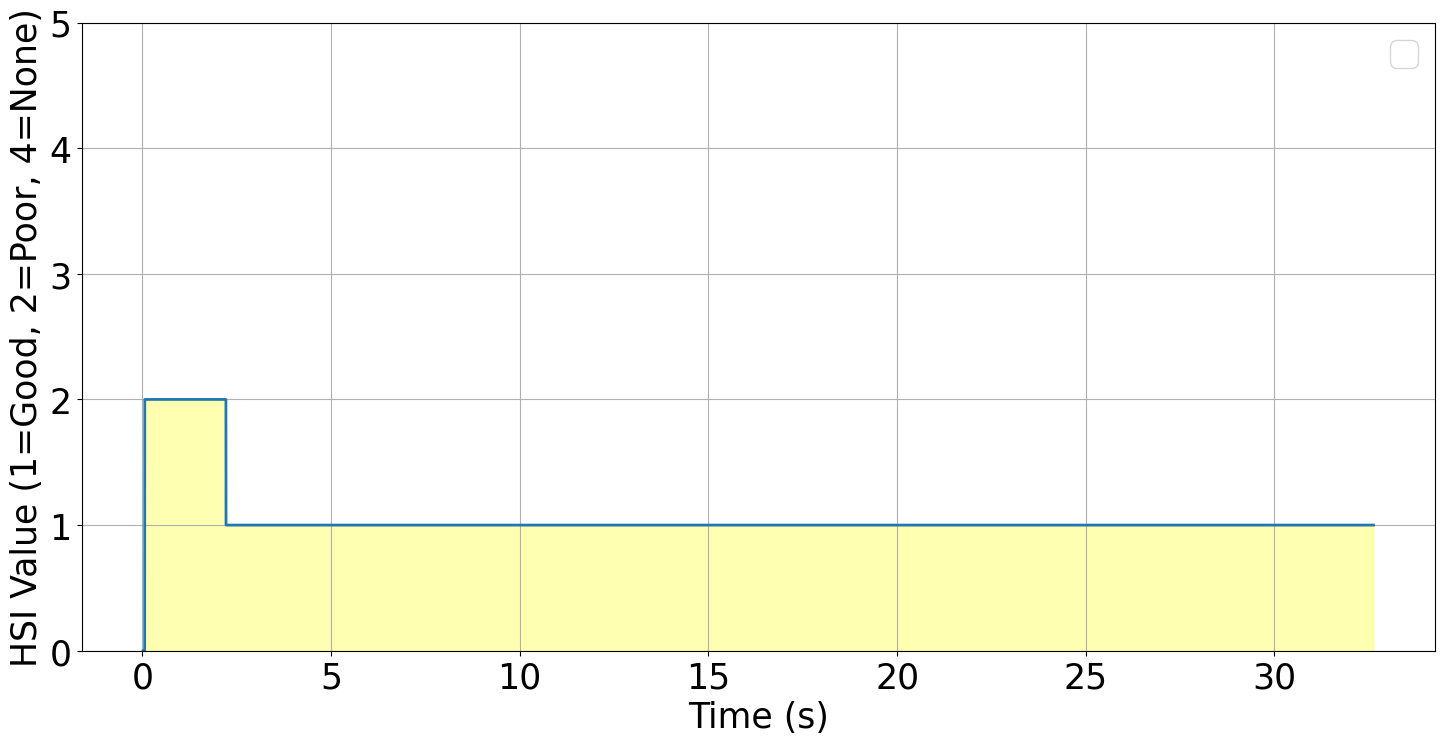

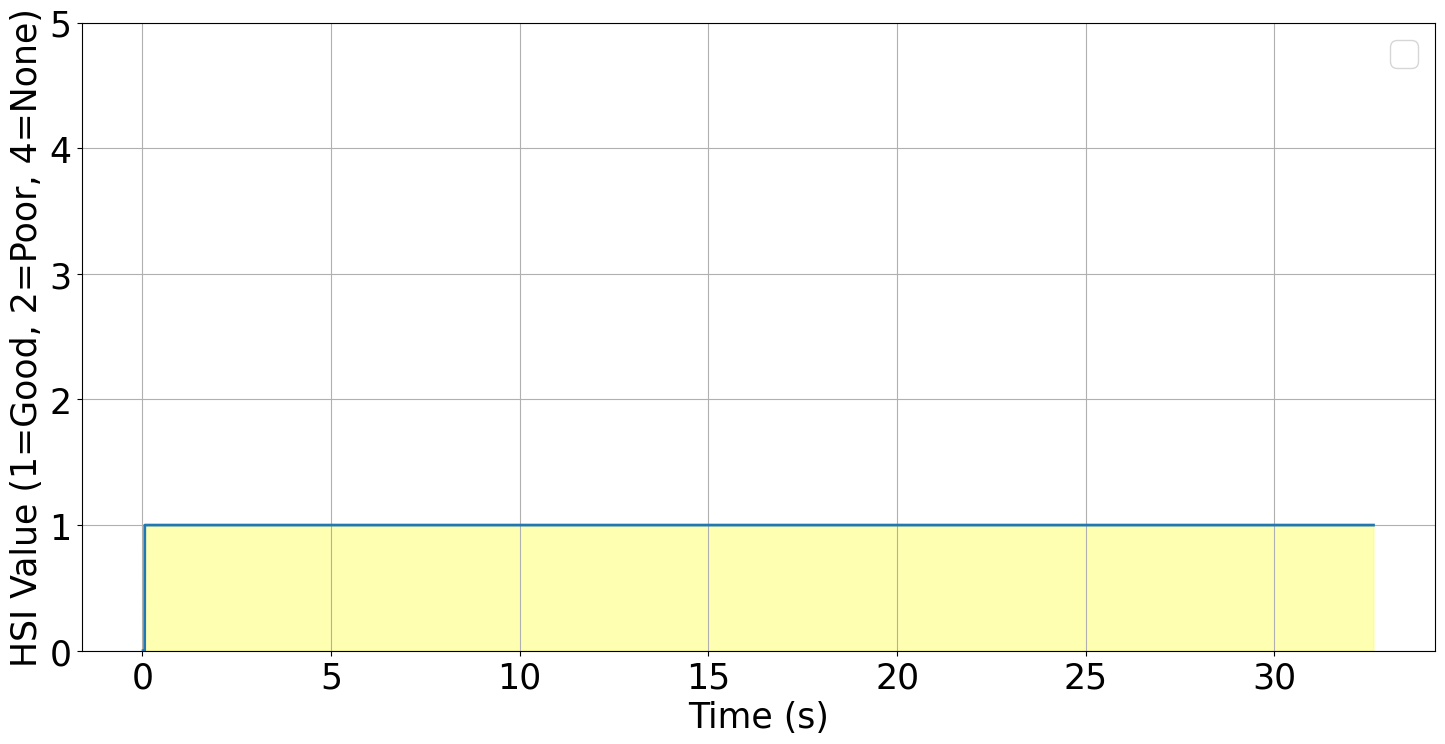

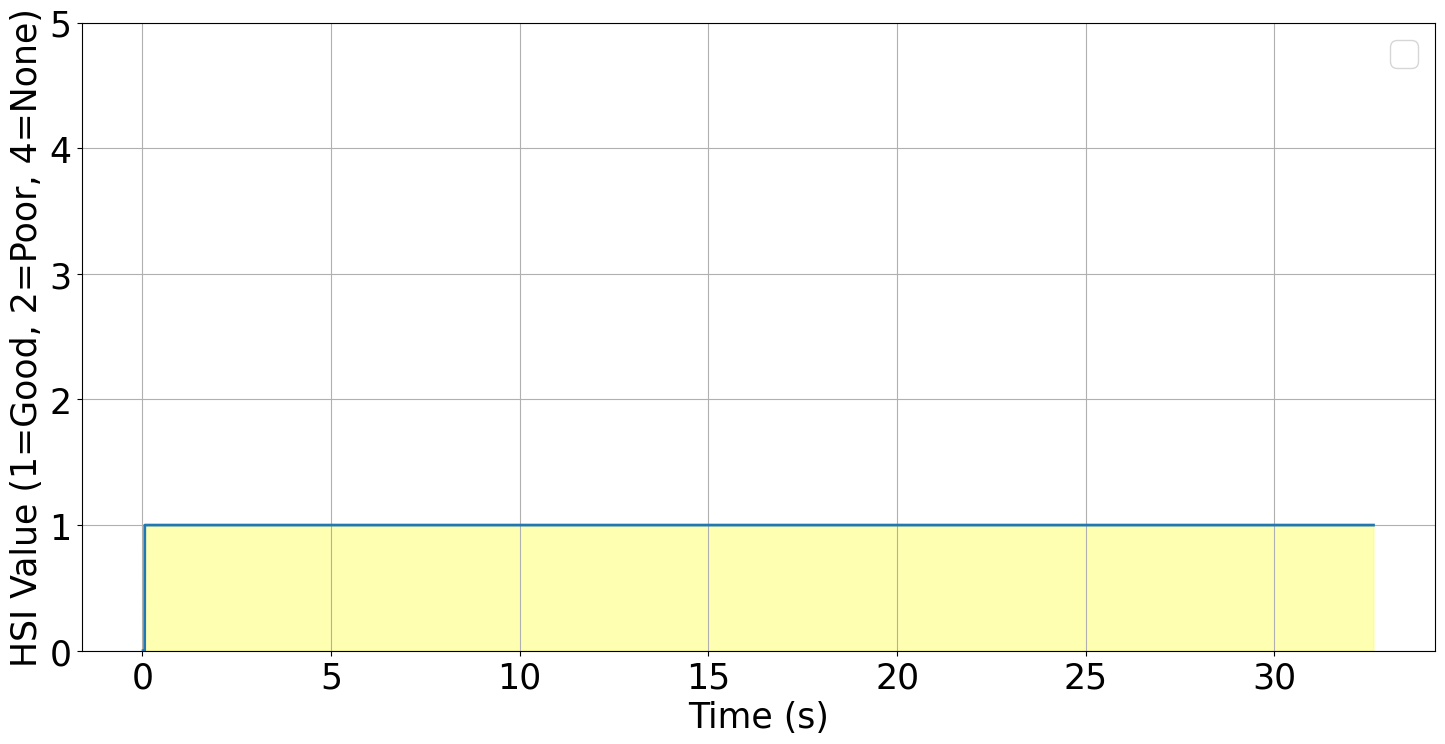

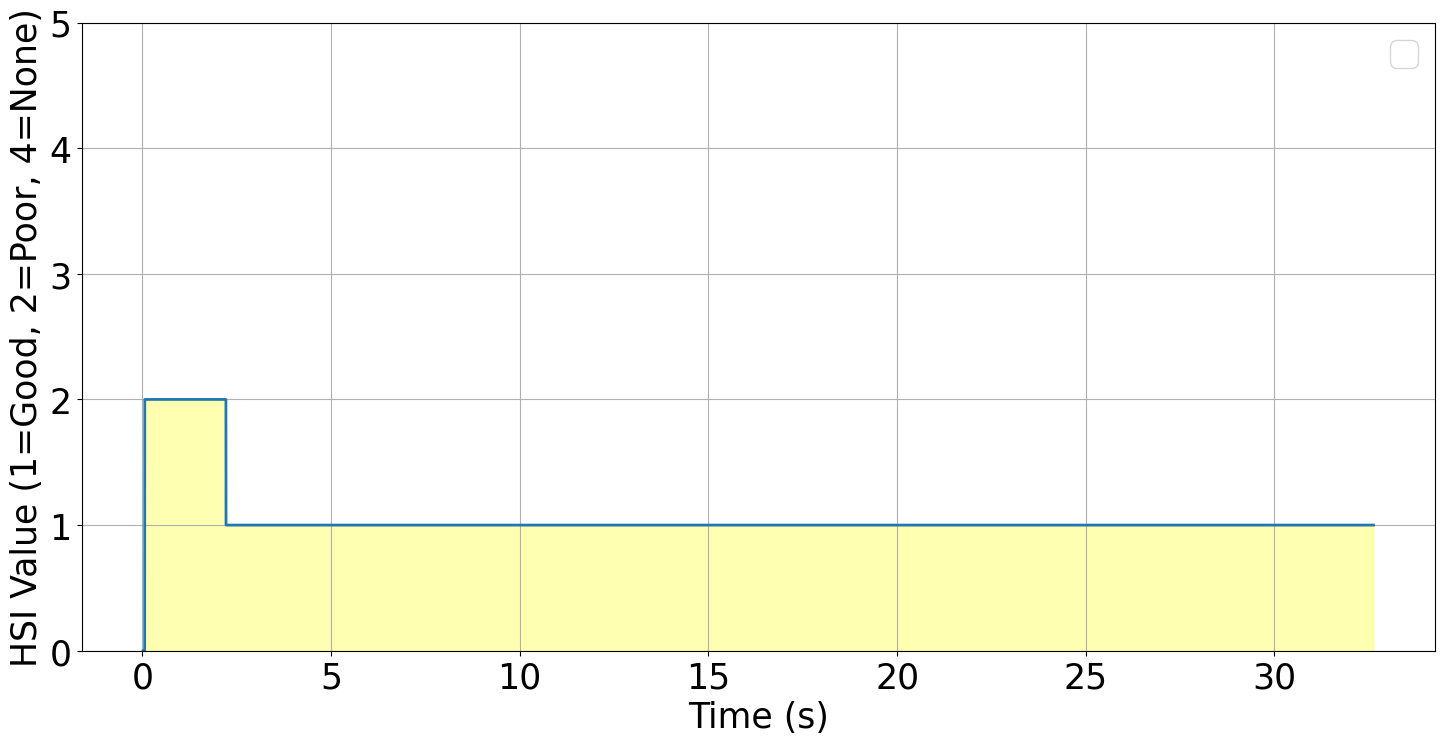

In [47]:
time_sec = df["ms_ELAPSED"] / 1000.0
hsi_channels = ["TP9_CONNECTION_STRENGTH(HSI)","AF7_CONNECTION_STRENGTH(HSI)","AF8_CONNECTION_STRENGTH(HSI)","TP10_CONNECTION_STRENGTH(HSI)"]

for hsi_ch in hsi_channels:

    plt.figure(figsize=(15, 8))

    #plottign the channel's values
    #plt.plot(time_sec, df[hsi_ch],label=hsi_ch, linewidth=2)
    plt.plot(time_sec, df[hsi_ch], linewidth=2)

    plt.xlabel("Time (s)")
    plt.ylabel("HSI Value (1=Good, 2=Poor, 4=None)")
    #plt.title(hsi_ch)

    plt.fill_between(time_sec, 0, df[hsi_ch], where=(df[hsi_ch] >0), color='yellow', alpha=0.3)

    plt.ylim(0, 5) #setting graph to display values between 0-5

    #Labeling the different HSI values 
    #plt.yticks([1, 2, 4], ['Good Connection','Poor Connection', 'No/Horrible Connection'])

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

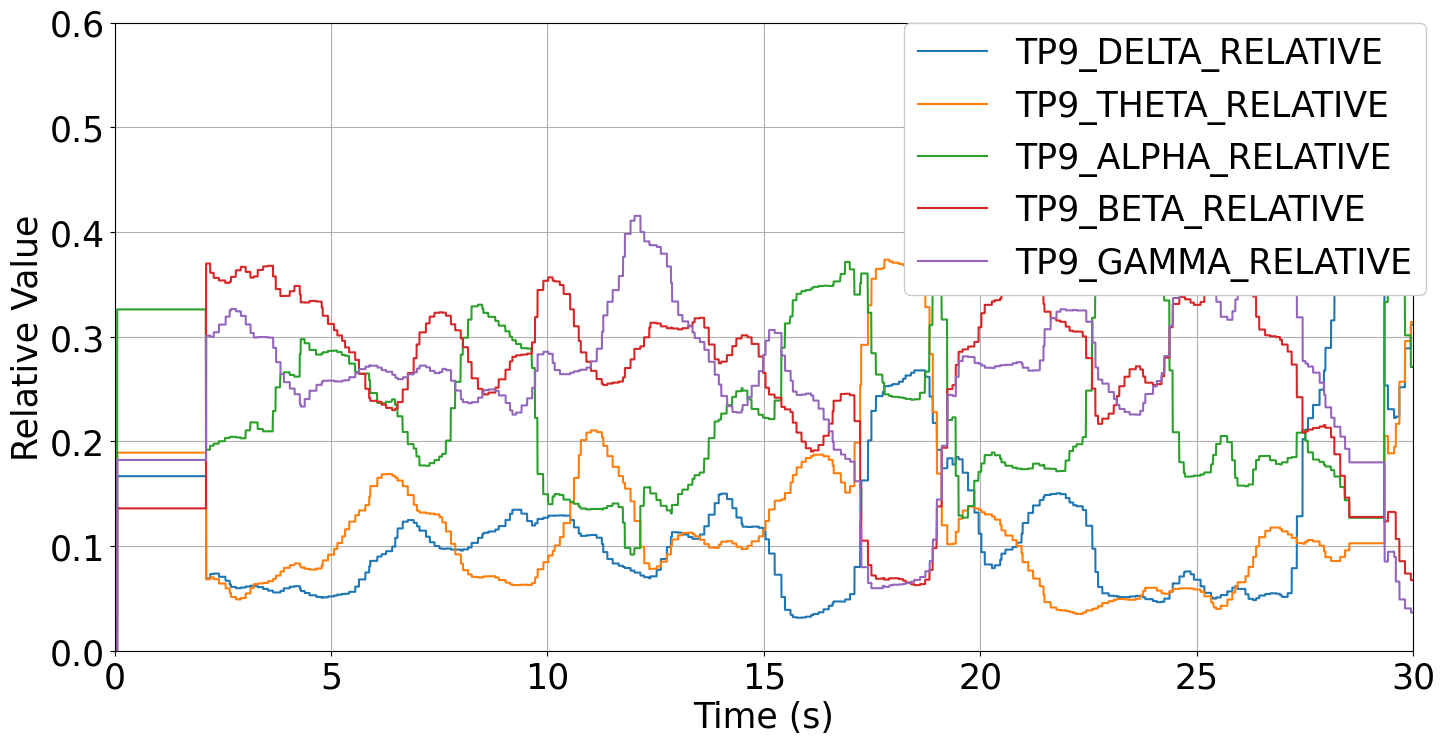

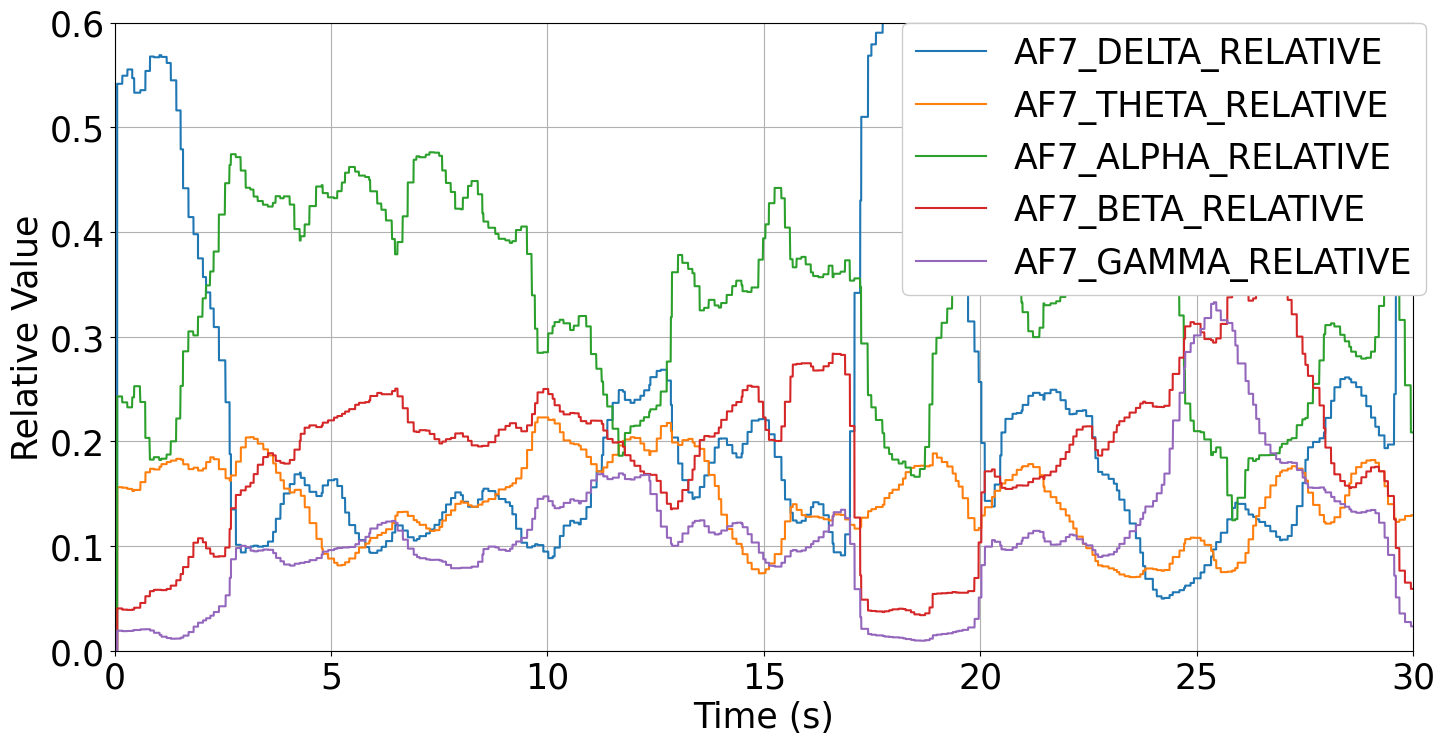

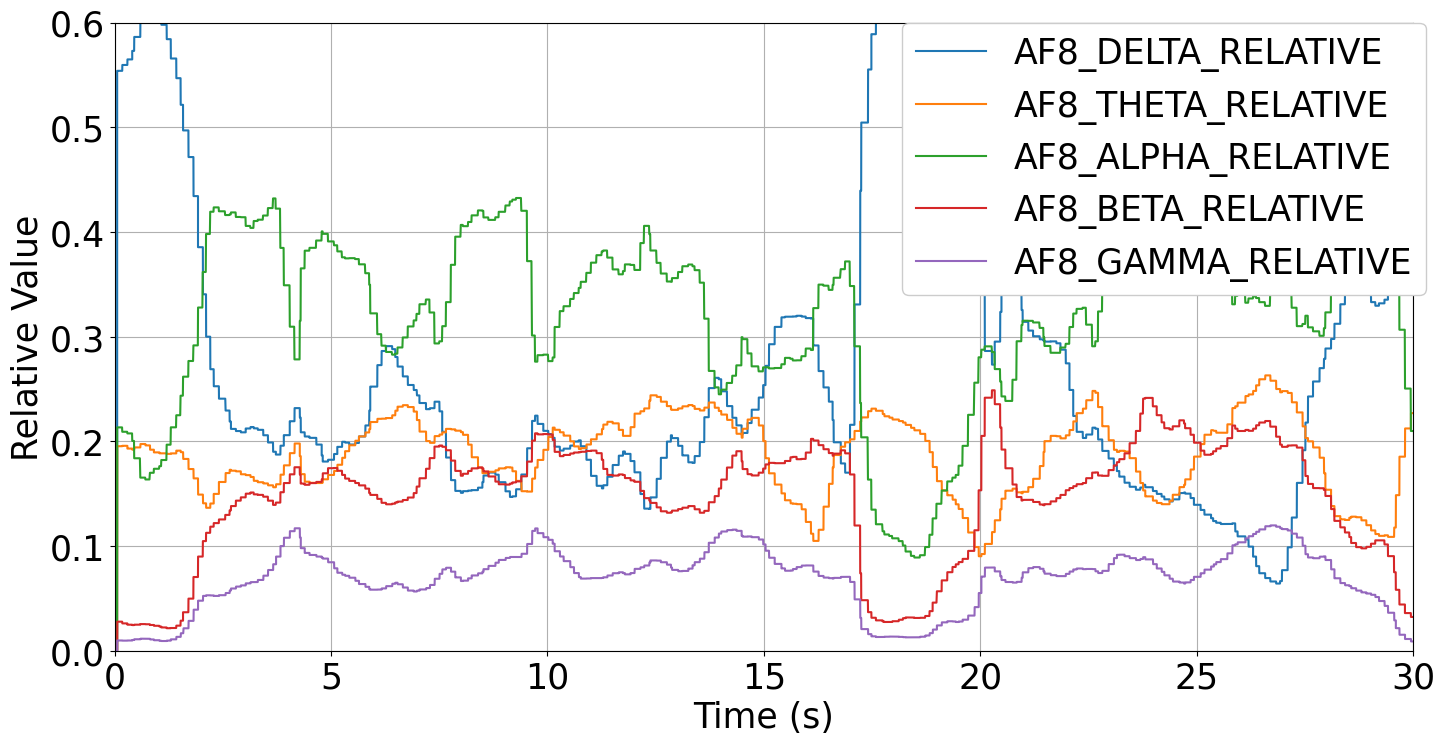

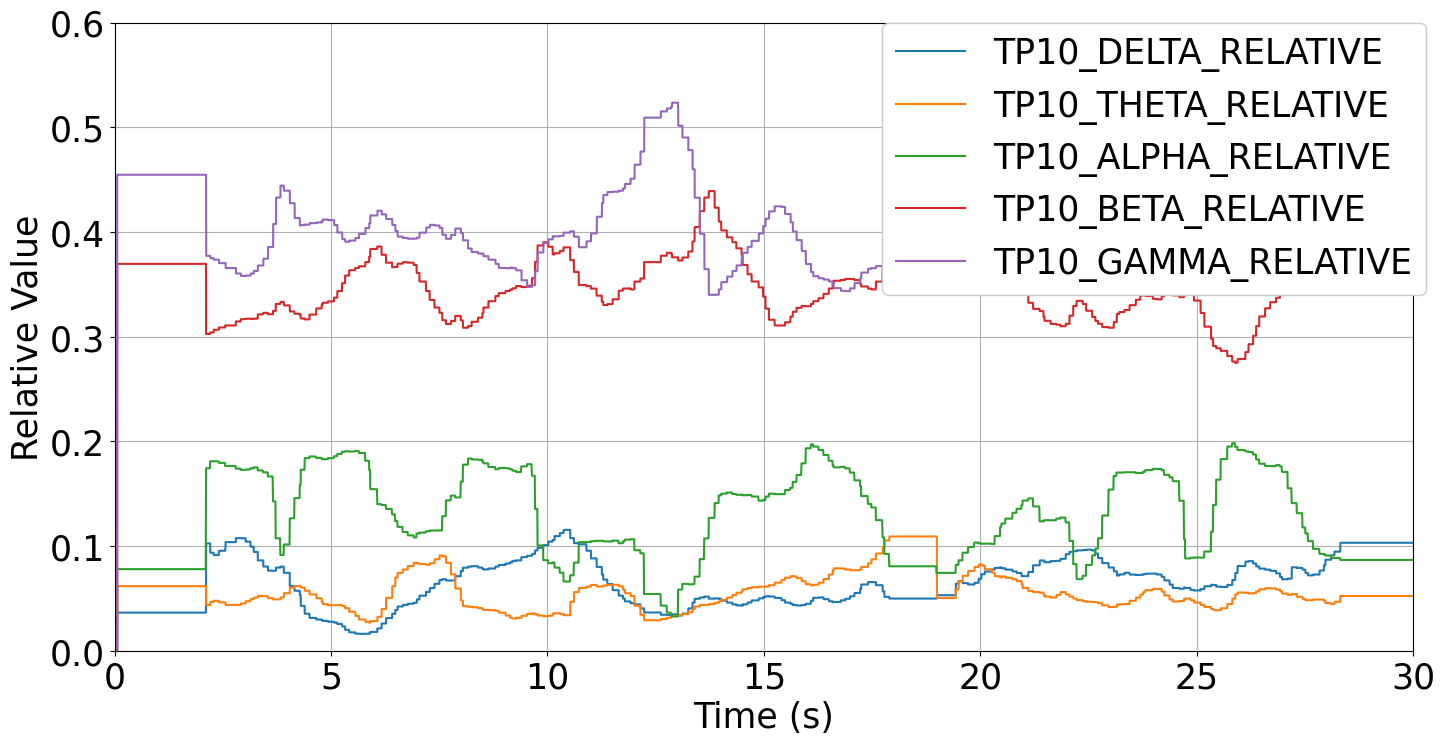

In [48]:
#This code graphs relative freqs over time

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]
waves = ["_DELTA", "_THETA", "_ALPHA", "_BETA", "_GAMMA"]

for ch in channels:

    plt.figure(figsize=(15, 8))

    for w in waves:
        
        d = ch + w + "_RELATIVE"
        
        plt.plot(time_sec, df[d], label=d)
        #plt.plot(time_sec, df[d])
    
    plt.xlabel("Time (s)")
    plt.ylabel("Relative Value")

    #plt.title(f"Relative Frequencies at " + ch)
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.01,1) , loc='upper right', borderaxespad=0. , framealpha=1)
    plt.xlim(0,30)
    plt.ylim(0, 0.6)
    plt.tight_layout()
    plt.show()


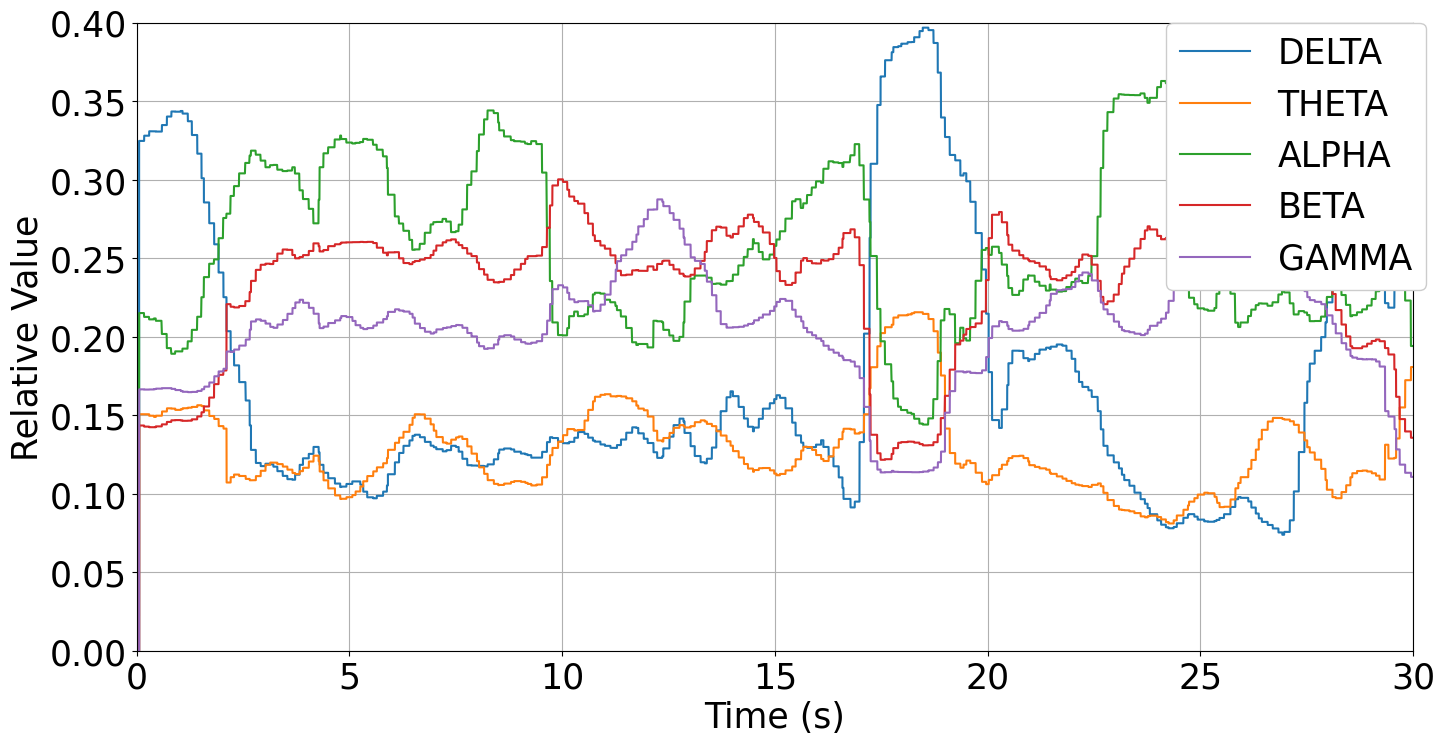

In [49]:
#Avg Relative Frequencies

time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9", "AF7", "AF8", "TP10"]
waves = ["DELTA", "THETA", "ALPHA", "BETA", "GAMMA"]

plt.figure(figsize=(15, 8))

plt.xlabel("Time (s)")
plt.ylabel("Relative Value")
#plt.title("Average Relative Frequencies ")

for w in waves:
    #collecting channel values for a wave
    waveChannels = []
    for ch in channels:
        waveChannels.append( ch + "_" + w + "_RELATIVE" )

    #take mean values of each waveChannel 
    wave_mean = df[waveChannels].mean(axis=1).values
    
    plt.plot(time_sec, wave_mean, label=(w))
    #plt.plot(time_sec, wave_mean)
        
plt.grid(True)
plt.legend(bbox_to_anchor=(1.01,1) , loc='upper right', borderaxespad=0. , framealpha=1)
plt.xlim(0,30)
plt.ylim(0, 0.4)
plt.tight_layout()
plt.show()

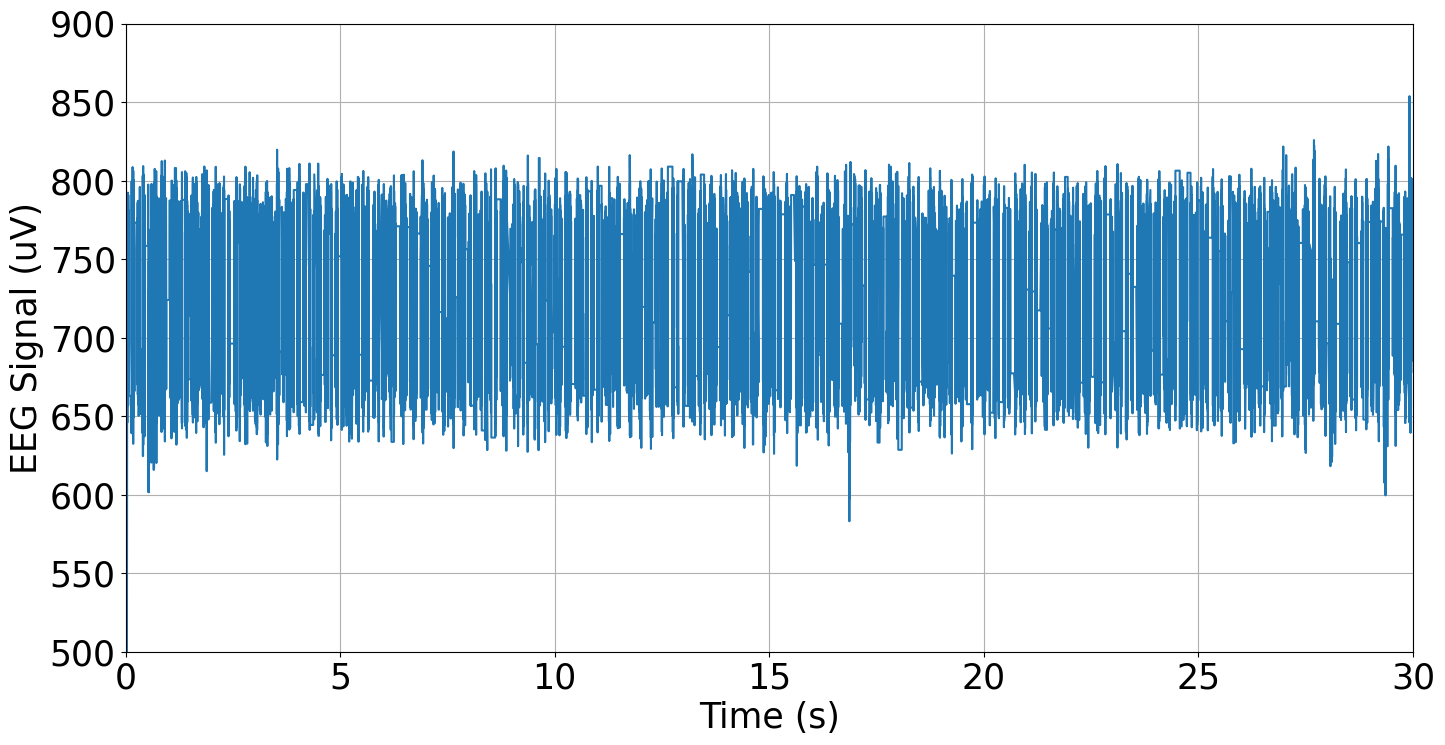

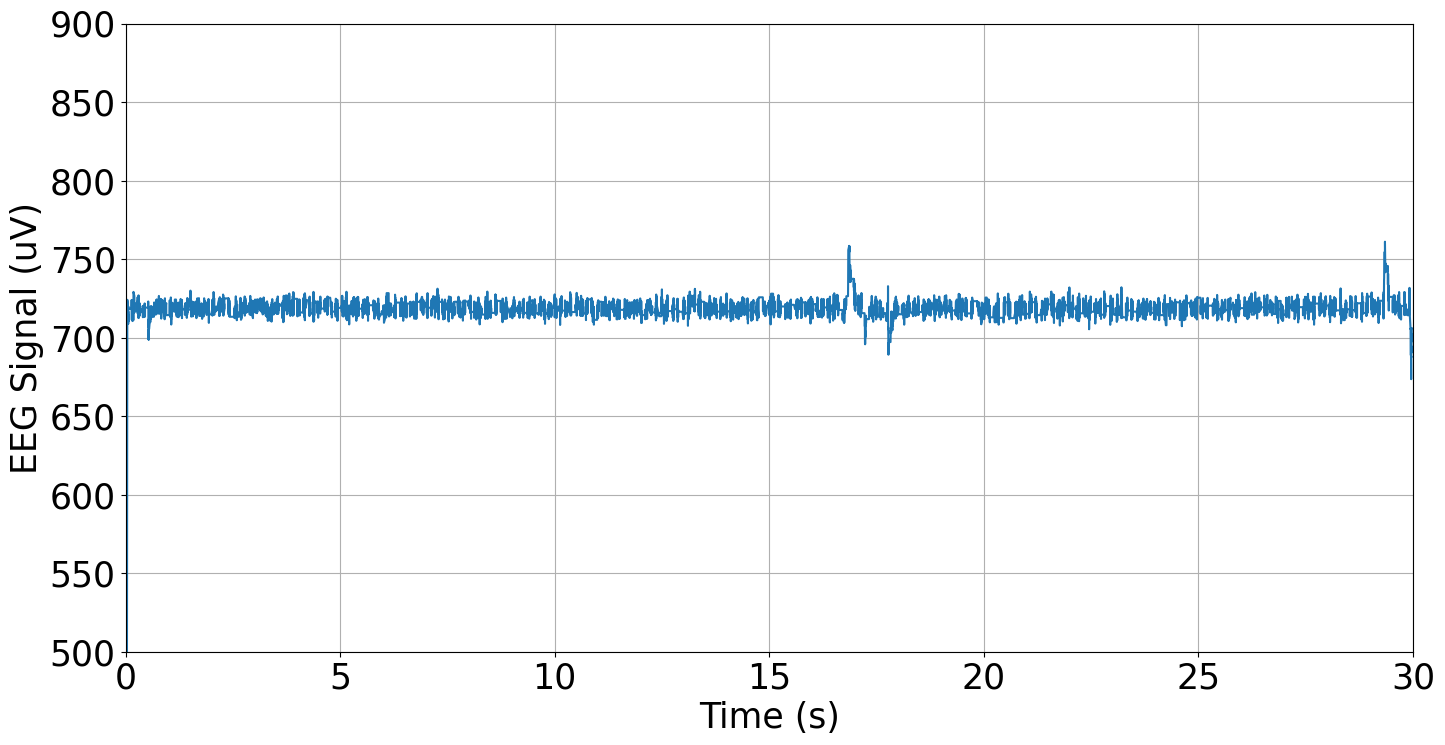

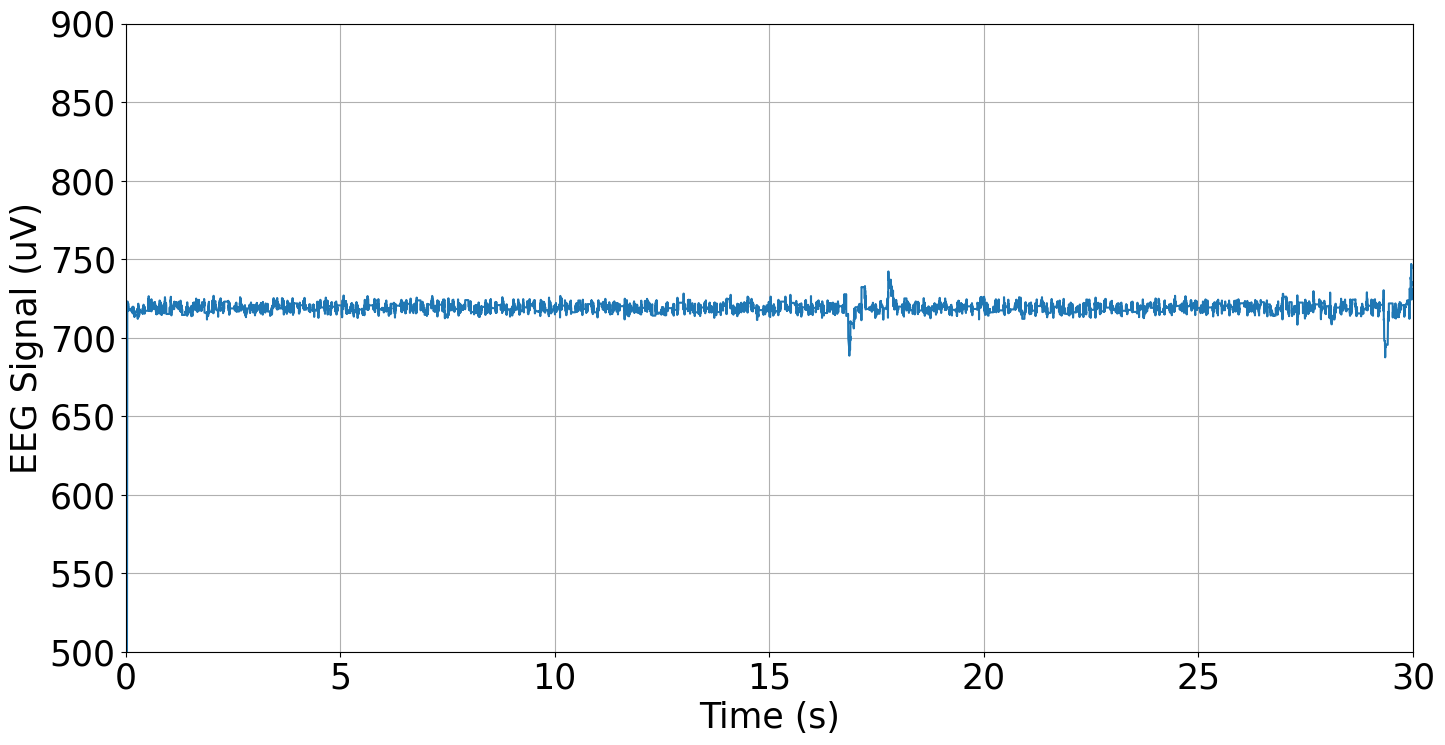

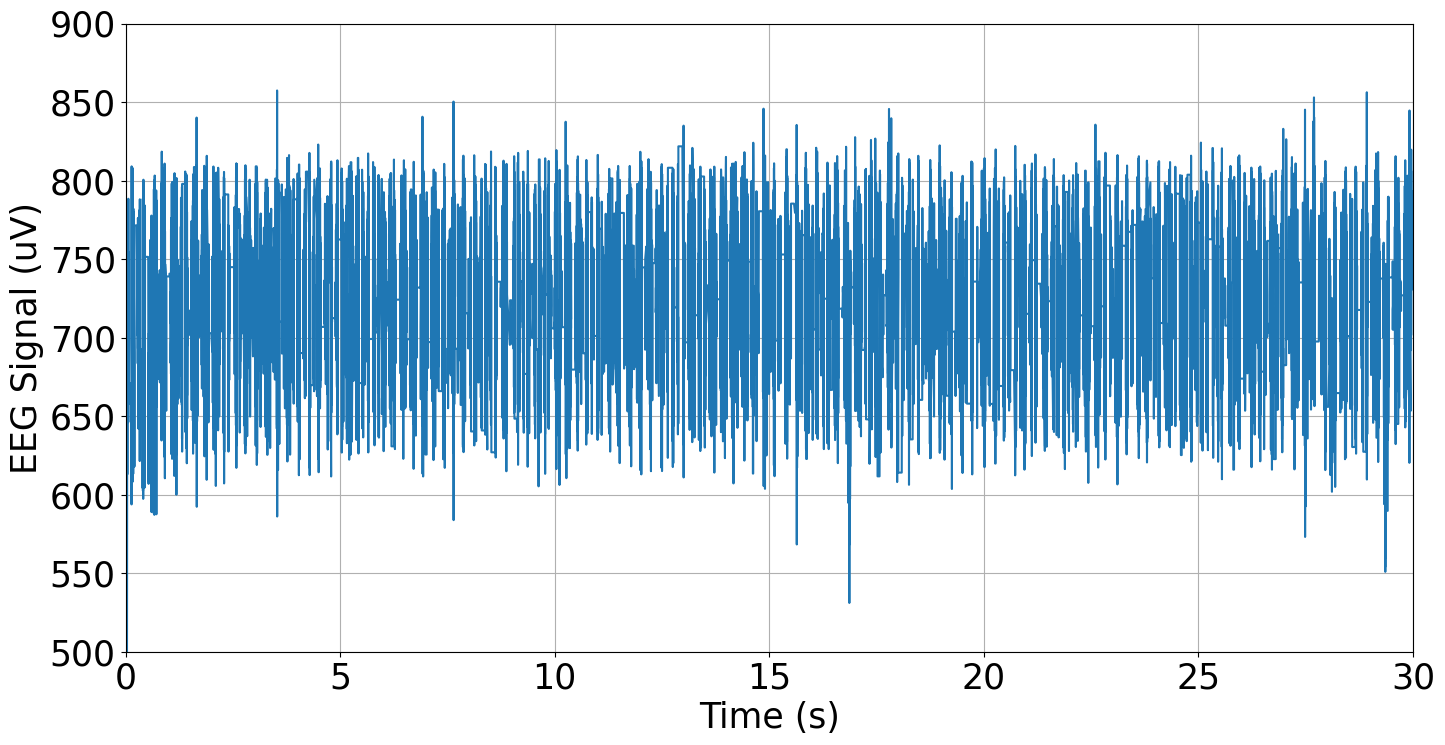

In [50]:
time_sec = df["ms_ELAPSED"] / 1000.0
channels = ["TP9_RAW", "AF7_RAW", "AF8_RAW", "TP10_RAW"]
fs = 256
window = 2

for ch in channels:

    plt.figure(figsize=(15, 8))
    #plt.plot(time_sec, df[ch], label=ch)
    plt.plot(time_sec, df[ch])

    plt.ylim(500,900)
    plt.xlim(0,30)

    plt.xlabel("Time (s)")
    plt.ylabel("EEG Signal (uV)")
    #plt.title(f"Raw EEG Signals from Muse Headset: Channel {ch}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

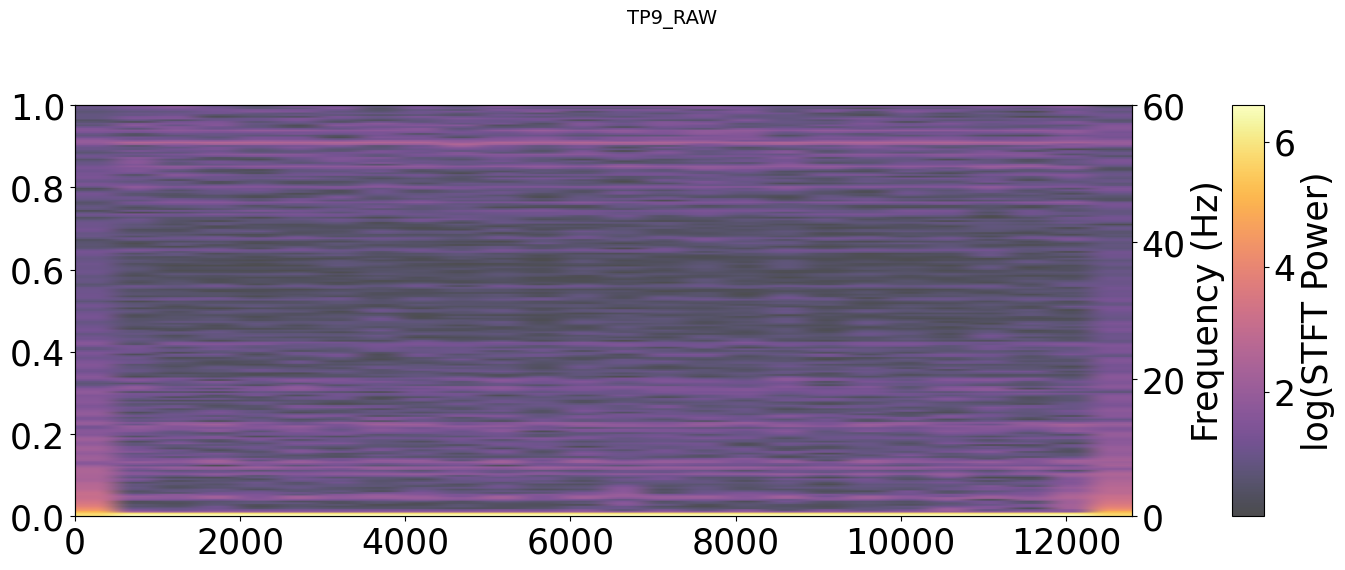

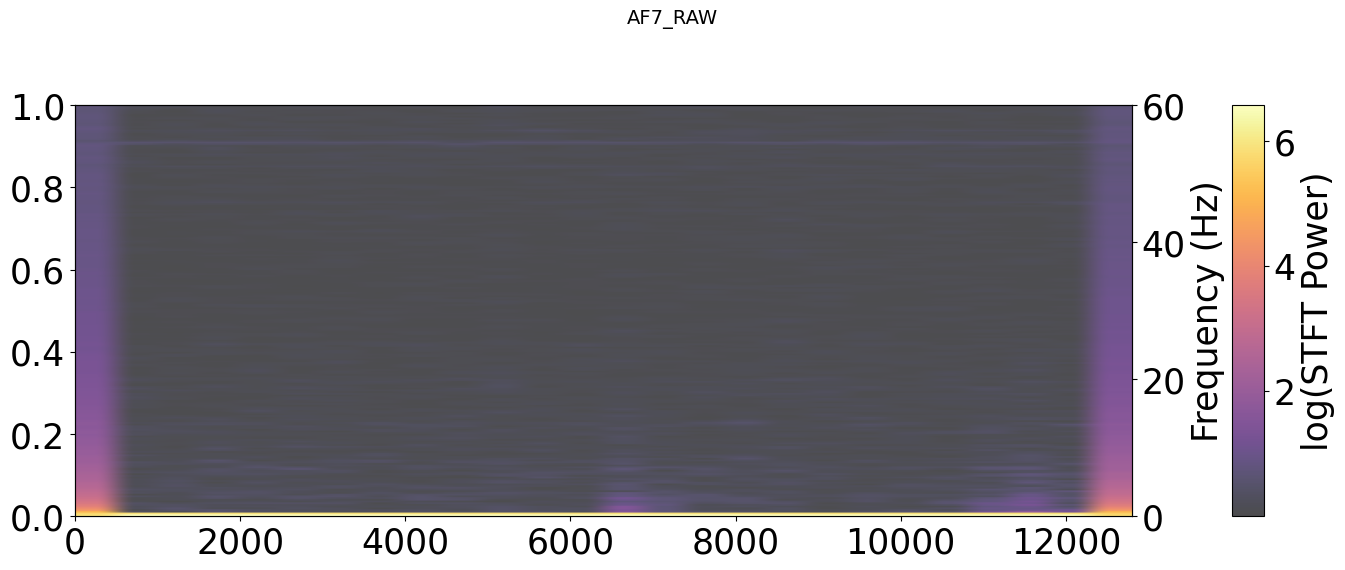

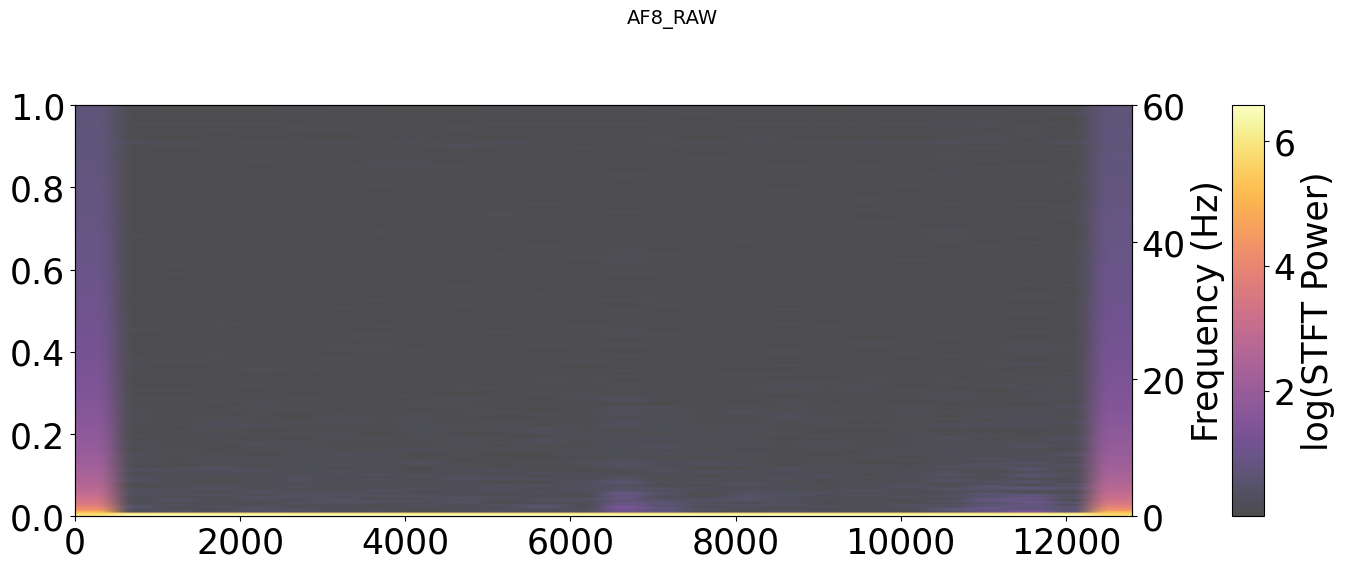

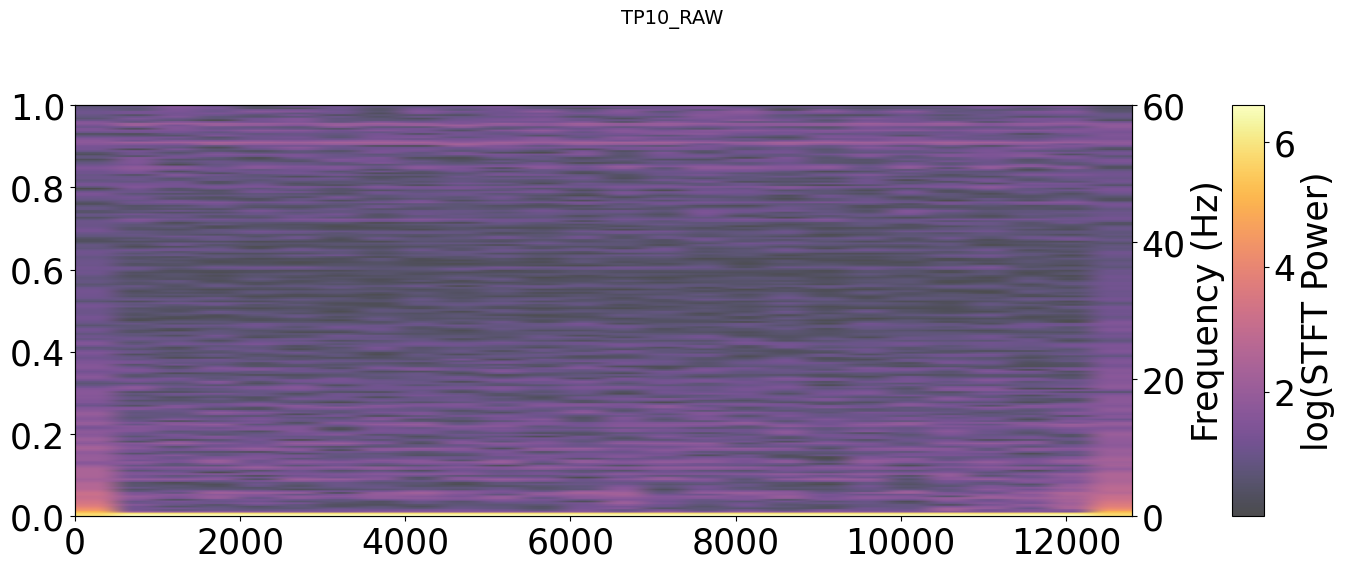

In [51]:
muse_df = df

channels = ["TP9_RAW", "AF7_RAW", "AF8_RAW", "TP10_RAW"]

for c in channels: 

    # Use a representative channel from the Muse data and apply STFT
    fs = 256  # sampling rate
    channel_name = c
    eeg = muse_df[channel_name].values
    channel_idx = muse_df.columns.get_loc(channel_name)

    nperseg = 1024
    freq_max = 60

    f, t, Zxx = stft(eeg, fs=fs, nperseg=nperseg)
    power = npy.abs(Zxx)
    global_t = t * fs  # convert to sample index
    power_log = npy.log1p(power)  # log transform for better contrast

    fig, ax2 = plt.subplots(figsize=(14, 6))

    ax1 = ax2.twinx()
    extent = [global_t[0], global_t[-1], 0, freq_max]
    im = ax1.imshow(power_log[f <= freq_max, :], extent=extent, aspect='auto',
                    origin='lower', cmap='inferno', alpha=0.7)
    ax1.set_ylabel('Frequency (Hz)')
    ax1.set_ylim(0, freq_max)

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes("right", size="3%", pad=1)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_label('log(STFT Power)')

    plt.suptitle(channel_name, fontsize=14, ha='center')
    fig.tight_layout()
    plt.show()


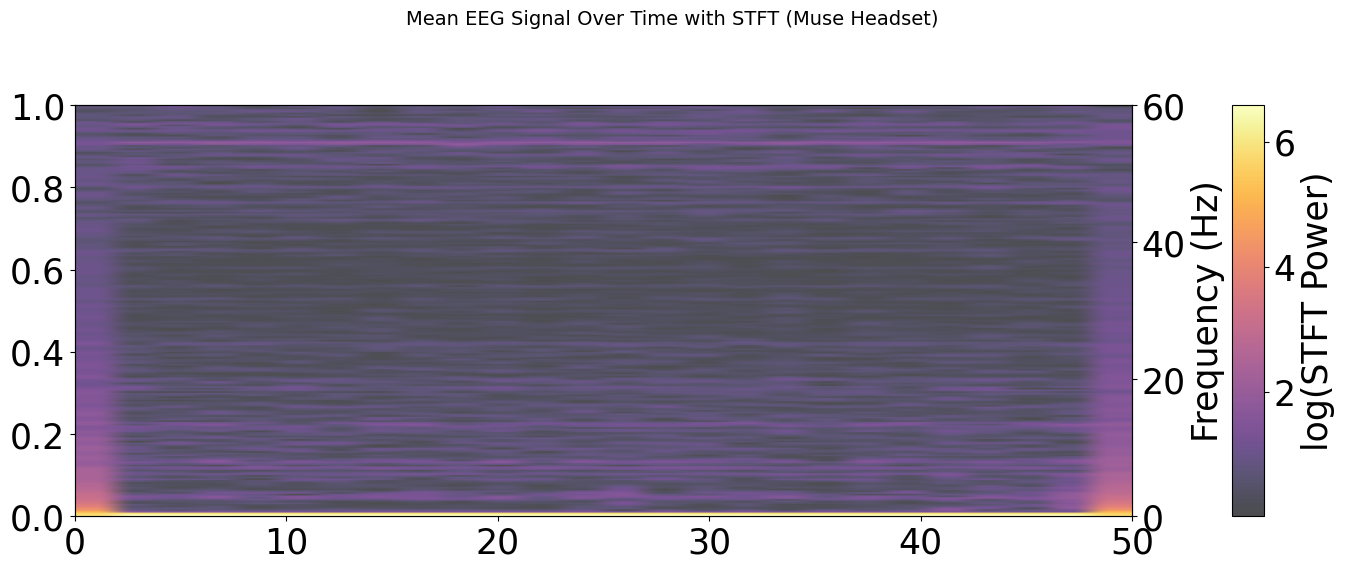

In [52]:
fs = 256  #Muse uses 256Hz
channels = ["TP9_RAW", "AF7_RAW", "AF8_RAW", "TP10_RAW"]
eeg_mean = df[channels].mean(axis=1).values
time_sec = df["ms_ELAPSED"] / 1000.0

nperseg = 1024
freq_max = 60  #Relevant bands

f, t, Zxx = stft(eeg_mean, fs=fs, nperseg=nperseg, boundary='zeros')
power = npy.abs(Zxx)
power_log = npy.log1p(power)  # log transform for visibility
time_stft_sec = t  # t is already in seconds

fig, ax2 = plt.subplots(figsize=(14, 6))

ax1 = ax2.twinx()
extent = [time_stft_sec[0], time_stft_sec[-1], 0, freq_max]
im = ax1.imshow(power_log[f <= freq_max, :], extent=extent, aspect='auto',
                origin='lower', cmap='inferno', alpha=0.7)
ax1.set_ylabel('Frequency (Hz)')
ax1.set_ylim(0, freq_max)

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="3%", pad=1)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('log(STFT Power)')

plt.suptitle("Mean EEG Signal Over Time with STFT (Muse Headset)", fontsize=14)
fig.tight_layout()
plt.show()


/tmp/ipykernel_7828/4247145911.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


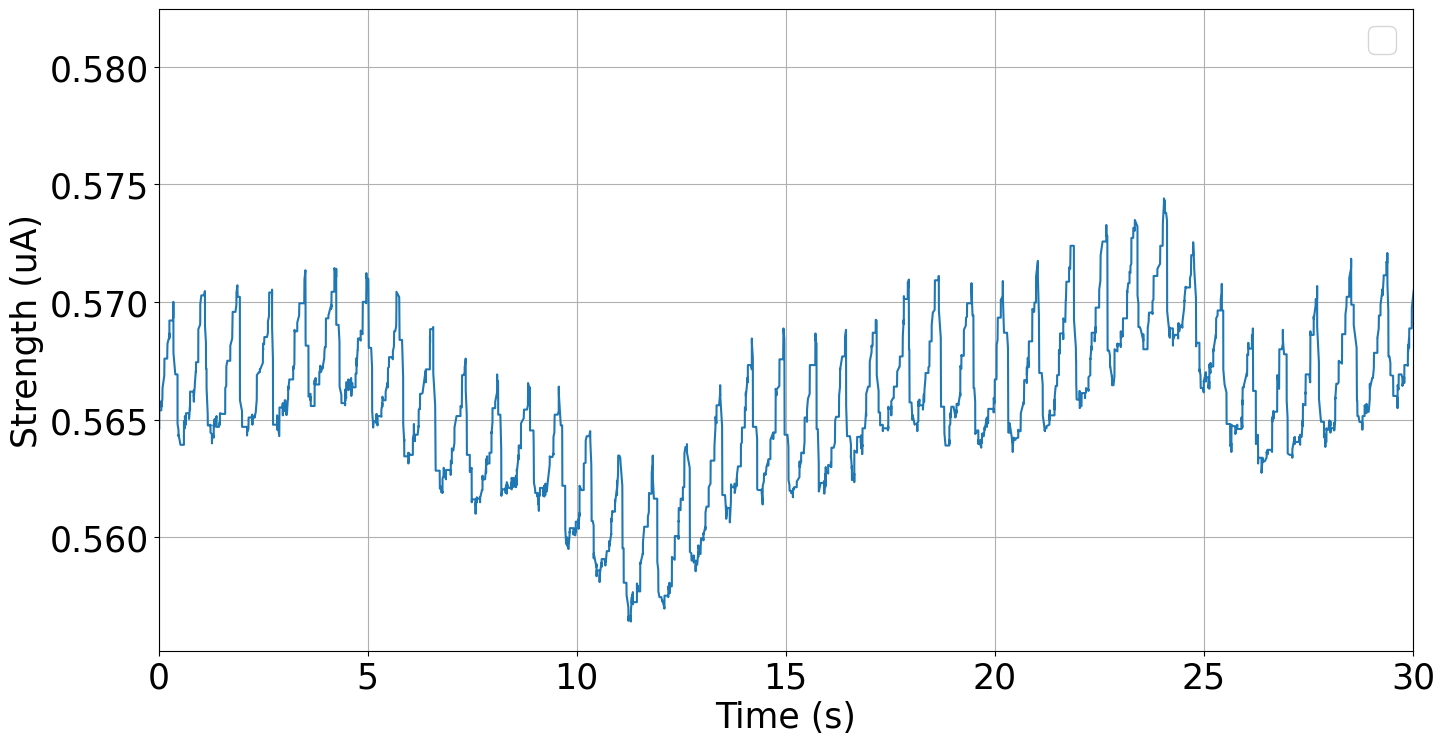

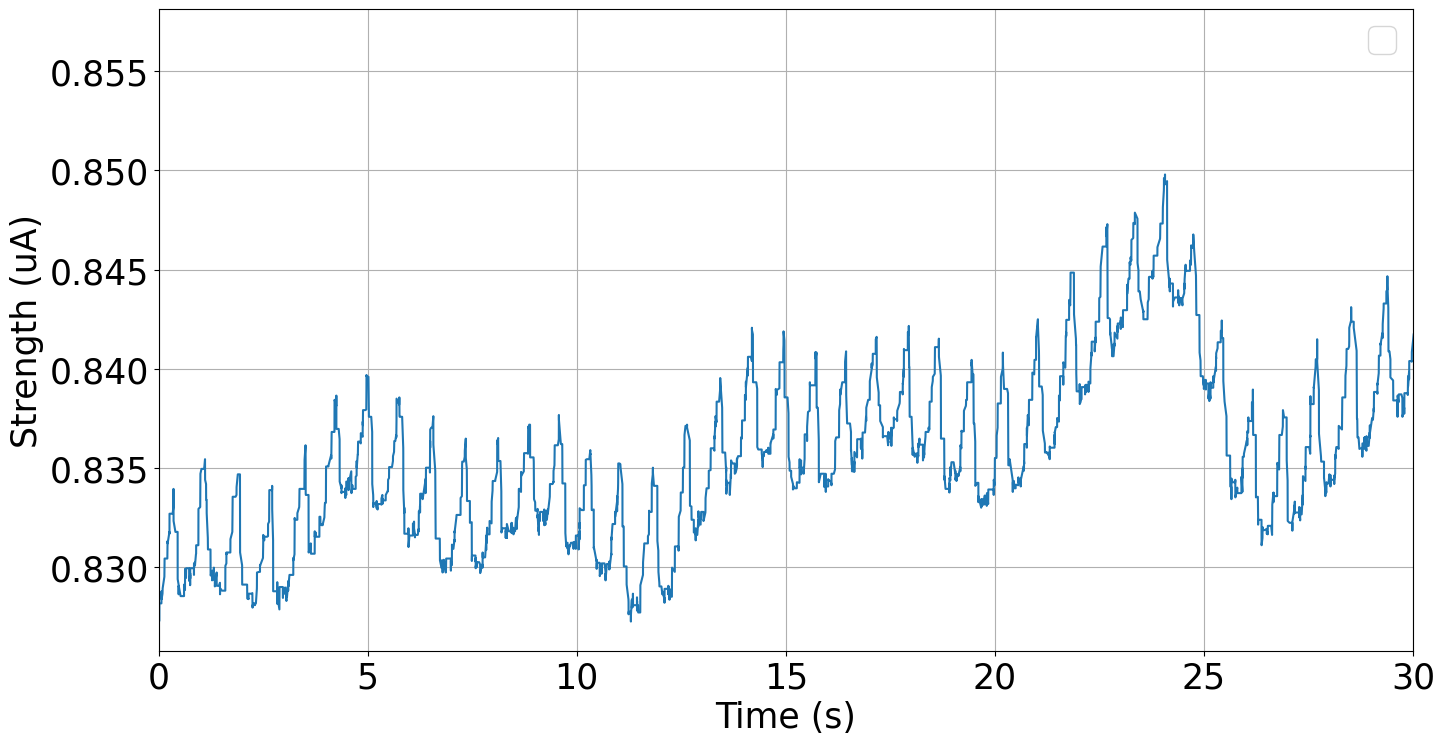

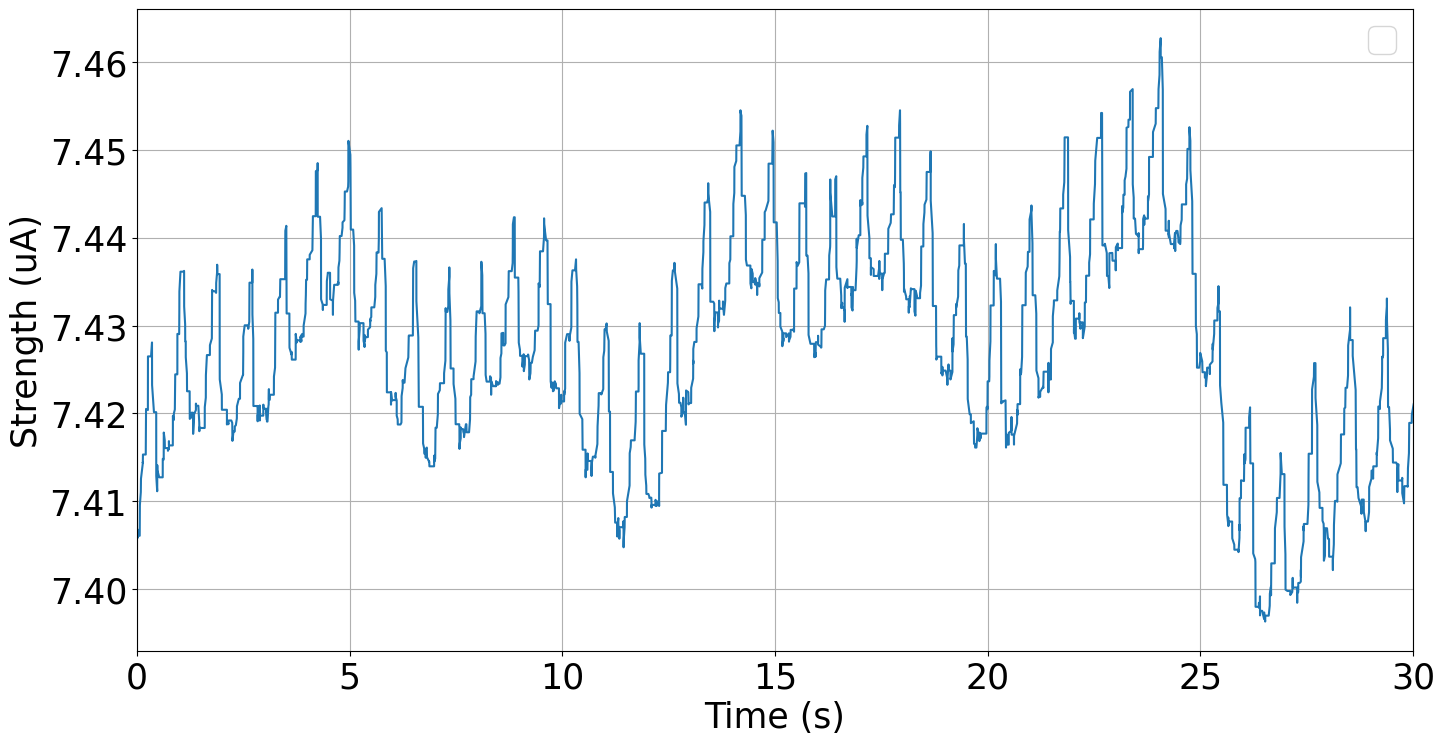

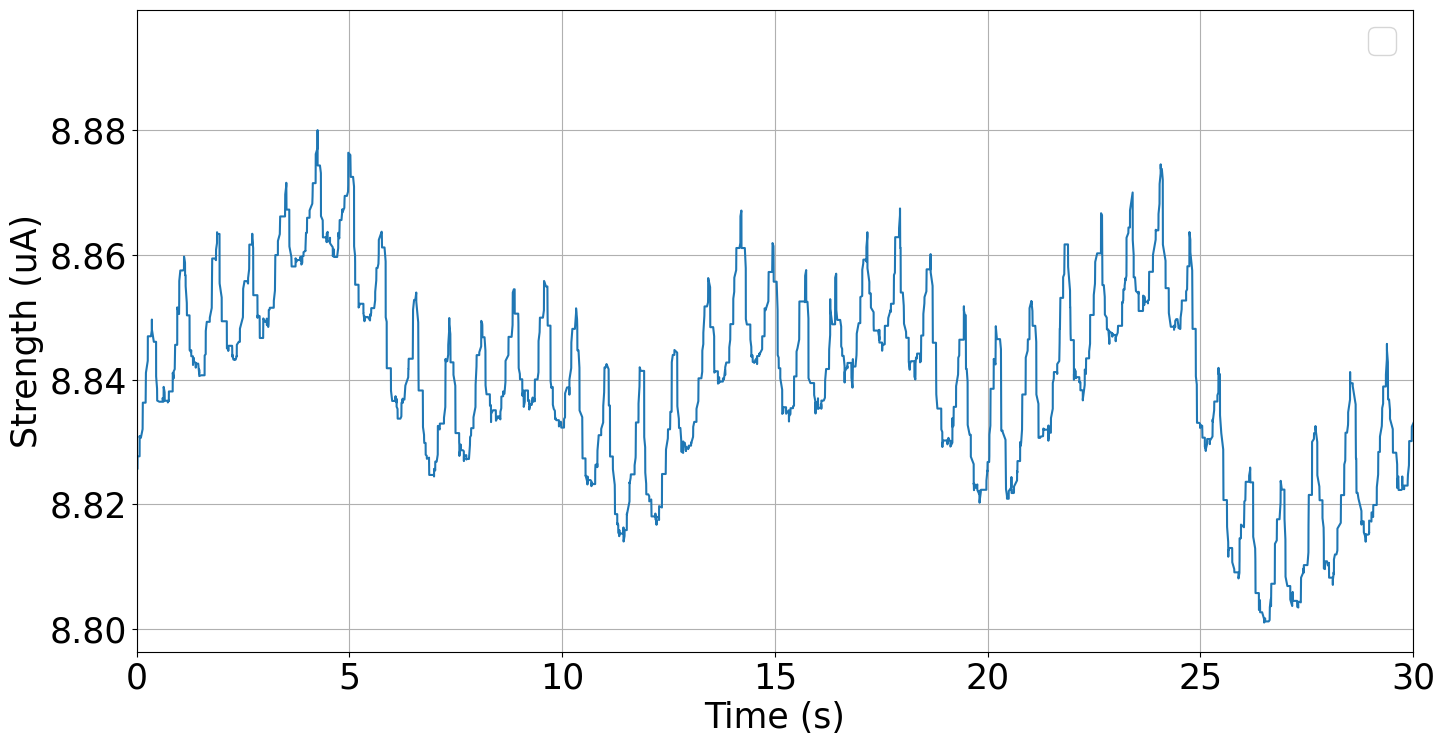

In [55]:
time_sec = df["ms_ELAPSED"] / 1000.0
#channels = ["730nm_LEFT_OUTER" , "730nm_RIGHT_OUTER" , "850nm_LEFT_OUTER","850nm_RIGHT_OUTER","730nm_LEFT_INNER","730nm_RIGHT_INNER","850nm_LEFT_INNER","850nm_RIGHT_INNER","RED_LEFT_OUTER","RED_RIGHT_OUTER","AMBIENT_LEFT_OUTER","AMBIENT_RIGHT_OUTER","RED_LEFT_INNER","RED_RIGHT_INNER","AMBIENT_LEFT_INNER","AMBIENT_RIGHT_INNER"]
channels = ["730nm_LEFT_OUTER" , "730nm_RIGHT_OUTER" , "730nm_LEFT_INNER","730nm_RIGHT_INNER"]

fs = 64
window = 2

for ch in channels:
    f, t, Zxx = stft(df[ch], fs=fs, window='boxcar', nperseg=window)
    power = npy.abs(Zxx).mean(axis=0)

    global_t = t * fs
    #interp_func = interp1d(global_t, power, kind='linear', bounds_error=False, fill_value=0)
    #interpolated_power = interp_func(npy.arange(len(df[ch])))

    #normalized_power = (interpolated_power - npy.min(interpolated_power)) / npy.ptp(interpolated_power)
    #normalized_power *= npy.max(npy.abs(df[ch])) * 0.5

    plt.figure(figsize=(15, 8))
    #plt.plot(time_sec, df[ch], label=ch)
    plt.plot(time_sec, df[ch])
    #plt.plot(time_sec, normalized_power, color='magenta', linewidth=2, label='STFT Power')
    plt.xlabel("Time (s)")
    plt.ylabel("Strength (uA)")
    #plt.title(f"Raw fNIRS - Channel {ch}")
    plt.xlim(0,30)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()